In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch
from vanilla.data import load_mnist
from vanilla.sgld import SGLD_sampler
from vanilla.nets.energy_function_anatomy_vanilla_cnn import Energy_function

CUDA = torch.cuda.is_available()
if CUDA:
    DEVICE = torch.device('cuda:0')
print('torch:', torch.__version__, 'CUDA:', CUDA)
## EBM hyper-parameters
sgld_noise_std = 7.5e-3
clipping_sgld = False
# LOAD_VERSION = 'ebm-lr=5.00E-05-data-std=7.50E-03-sgld-steps=4.00E+01-size=1.00E+00-std=5.00E-03-reg=1.00E-03-clip=False'
LOAD_VERSION = 'mnist-anatomy-vanilla-cnn'
print('Load trained energy function...')
ef = Energy_function()
if CUDA:
    ef.cuda().to(DEVICE)   
ef.load_state_dict(torch.load('../weights/ef-%s' % LOAD_VERSION))

torch: 1.3.0 CUDA: True
Load trained energy function...
Initialize SGLD sampler...


In [2]:
import torch
a = torch.randn(2, 3, 5, 4)
a

tensor([[[[-2.0188, -0.5367,  0.7975,  0.9424],
          [-0.0436, -0.7644, -0.0360,  0.5704],
          [ 0.1074, -0.2890, -0.5175,  1.1766],
          [ 0.4297, -1.6600, -0.9408,  0.2223],
          [ 0.0134,  0.2933, -0.6123,  0.8813]],

         [[ 0.0883,  0.3282,  1.0246, -0.2337],
          [ 0.1397, -0.5042, -1.8165, -0.1596],
          [-0.0581, -0.7225,  1.3755,  1.1353],
          [-0.3094,  0.4162,  0.1144,  0.2185],
          [ 0.9711, -0.2013, -0.9351,  1.7572]],

         [[ 0.4361,  0.6128,  0.5591,  0.2141],
          [ 1.0643,  0.7228, -0.6590,  0.3910],
          [ 1.0268,  0.4905, -1.5626,  0.6488],
          [ 0.2398,  1.2702,  1.1851, -0.4687],
          [-0.8488, -1.8330,  1.7571, -1.4196]]],


        [[[-0.3053, -0.3619,  2.2063,  1.9582],
          [-0.8013, -0.0132, -0.1947, -0.9912],
          [-0.1870,  0.6749,  0.6702,  0.9108],
          [ 1.0736,  0.8980, -0.8352, -1.1371],
          [ 0.0140, -0.4223, -2.3973,  0.2636]],

         [[ 0.9004, -0.4539,  

In [22]:
visual_sample_size = 100
pixels_size = 32
ebm_images = sgld_sampler.sgld_update(ef=ef, 
                                      batch_size=visual_sample_size, 
                                      pixels_size=pixels_size, 
                                      num_steps=100, 
                                      step_size=1,
                                      buffer_size=None,
                                      buffer_percent=None,
                                      persistent=False)
ebm_images = ebm_images.squeeze(0).cpu().view(visual_sample_size, pixels_size, pixels_size)
ebm_images = torch.clamp(ebm_images, min=-1, max=1) * 0.5 + 0.5

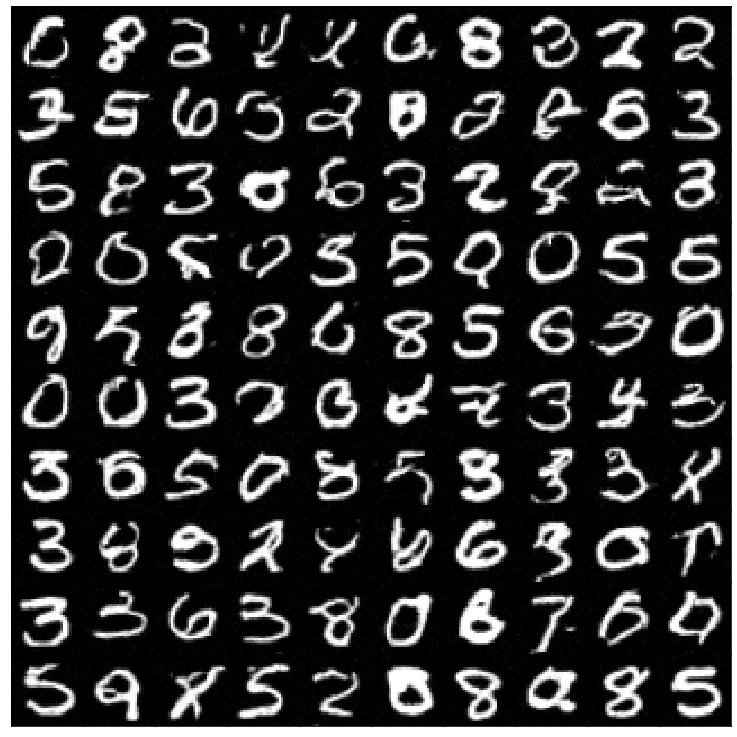

In [23]:
gs = gridspec.GridSpec(int(visual_sample_size/10), 10)
gs.update(left=0.0 , bottom=0.0, right=1.0, top=1.0, wspace=0, hspace=0)
fig = plt.figure(figsize=(10, 10*int(visual_sample_size/10)/ 10))
for i in range(visual_sample_size):
    ax = fig.add_subplot(gs[int(i/10), i%10])
    ax.imshow(ebm_images[i], cmap='gray', vmin=0, vmax=1.0)
    ax.set_xticks([])
    ax.set_yticks([])
# plt.savefig('ghost.svg')